#                        EDA Evolución del PIB Mundial a lo largo de los años


In [27]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

## 1- Importamos y creamos el Dataset con el que vamos a trabajar

In [38]:


# Leemos los archivos para unifocarlos en una variable y poder trabajar con ellos 

archivo1 = pd.read_csv('country_codes.csv')
archivo2 = pd.read_csv('gdp_data.csv')

# Creamos una variable en el que ya queden los dos archivos emparejados

emparejados = pd.merge(archivo1, archivo2, on='country_code')




In [39]:
# Exportamos esa variable a un archivo csv para trabajar con el 
emparejados.to_csv('resultado_emparejados.csv', index=False)
emparejados.head()

,country_code,region,income_group,country_name,year,value
0,ABW,Latin America & Caribbean,High income,Aruba,1986,405586592.2
1,ABW,Latin America & Caribbean,High income,Aruba,1987,487709497.2
2,ABW,Latin America & Caribbean,High income,Aruba,1988,596648044.7
3,ABW,Latin America & Caribbean,High income,Aruba,1989,695530726.3
4,ABW,Latin America & Caribbean,High income,Aruba,1990,764804469.3


## 2 - Exploración de datos y limpieza

In [46]:
emparejados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10548 entries, 0 to 10547
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country_code  10548 non-null  object 
 1   region        10548 non-null  object 
 2   income_group  10548 non-null  object 
 3   country_name  10548 non-null  object 
 4   year          10548 non-null  int64  
 5   value         10548 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 576.8+ KB


**Vamos a verificar si tenemos valores nulos**

In [47]:
emparejados.isnull().sum()

country_code    0
region          0
income_group    0
country_name    0
year            0
value           0
dtype: int64

In [48]:
emparejados.describe()

,year,value
count,10548.000000,1.054800e+04
mean,1994.977436,1.902435e+11
std,17.364673,1.031776e+12
min,1960.000000,8.824746e+06
25%,1981.000000,1.547855e+09
50%,1997.000000,8.140967e+09
75%,2010.000000,5.409850e+10
max,2022.000000,2.550000e+13


**Ahora que vemos que los datos estan limpios, empezamos con el análisis** 

## 3 - Análisis de datos y visualización

**Veamos una visualización mundial del crecimiento del PIB a lo largo de los años**

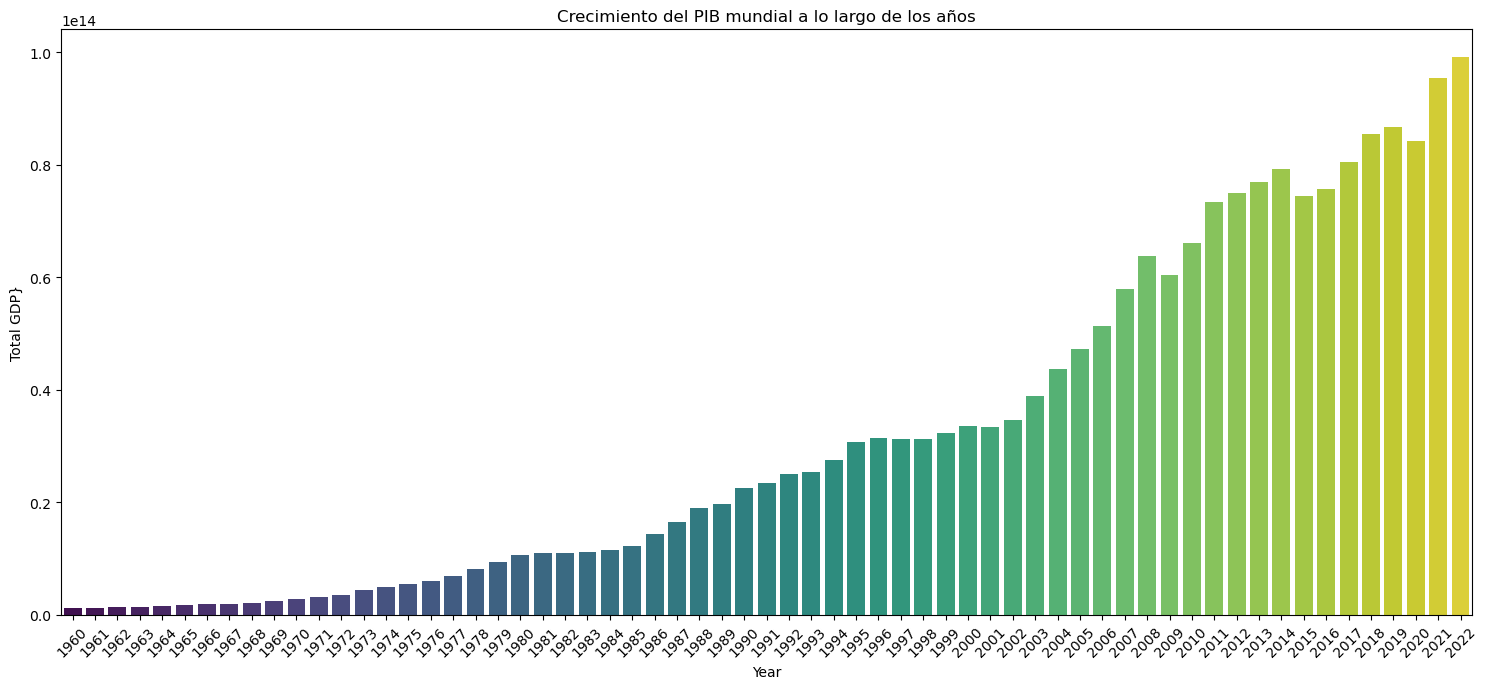

In [49]:
# Agrupamos los años y calculamos 'value' por cada año
total_año_gdp = emparejados.groupby("year")["value"].sum().reset_index()

# Ordeamos el Dataframe por el total de 'value' de forma descendente
total_año_gdp = total_año_gdp.sort_values(by="value", ascending=False)

# Creamos graficas con plot
plt.figure(figsize=(15, 7))
sns.barplot(x="year", y="value", data=total_año_gdp, palette="viridis")
plt.xlabel("Year")
plt.ylabel("Total GDP}")
plt.title("Crecimiento del PIB mundial a lo largo de los años")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Como era de esperar vemos un gran aumento del PIB desde los años 60 hasta ahora**

In [53]:
years = sorted(emparejados['year'].unique().tolist())
def make_plot_data() -> dict:
    plot_df = emparejados
    data = [dict(type='choropleth', locations = plot_df[plot_df['year'] == year]['country_code'], 
                 z=plot_df[plot_df['year'] == year]['value'],
                 hovertext=plot_df[plot_df['year'] == year]['country_name']) for year in years]
    steps = [dict(method='restyle', args=['visible', [other == year for other in years]], label=year) for year in years]
    layout = dict(geo=dict(scope='world'), sliders=[dict(active=0, pad={'t': 1}, steps=steps)], title="Crecimiento del PIB mundial a lo largo de los años")
    return dict(data=data, layout=layout)

from plotly.offline import init_notebook_mode, iplot

init_notebook_mode(connected=True)
iplot(make_plot_data())


Text(0.5, 1.0, 'Crecimiento del PIB mundial a lo largo de los años')

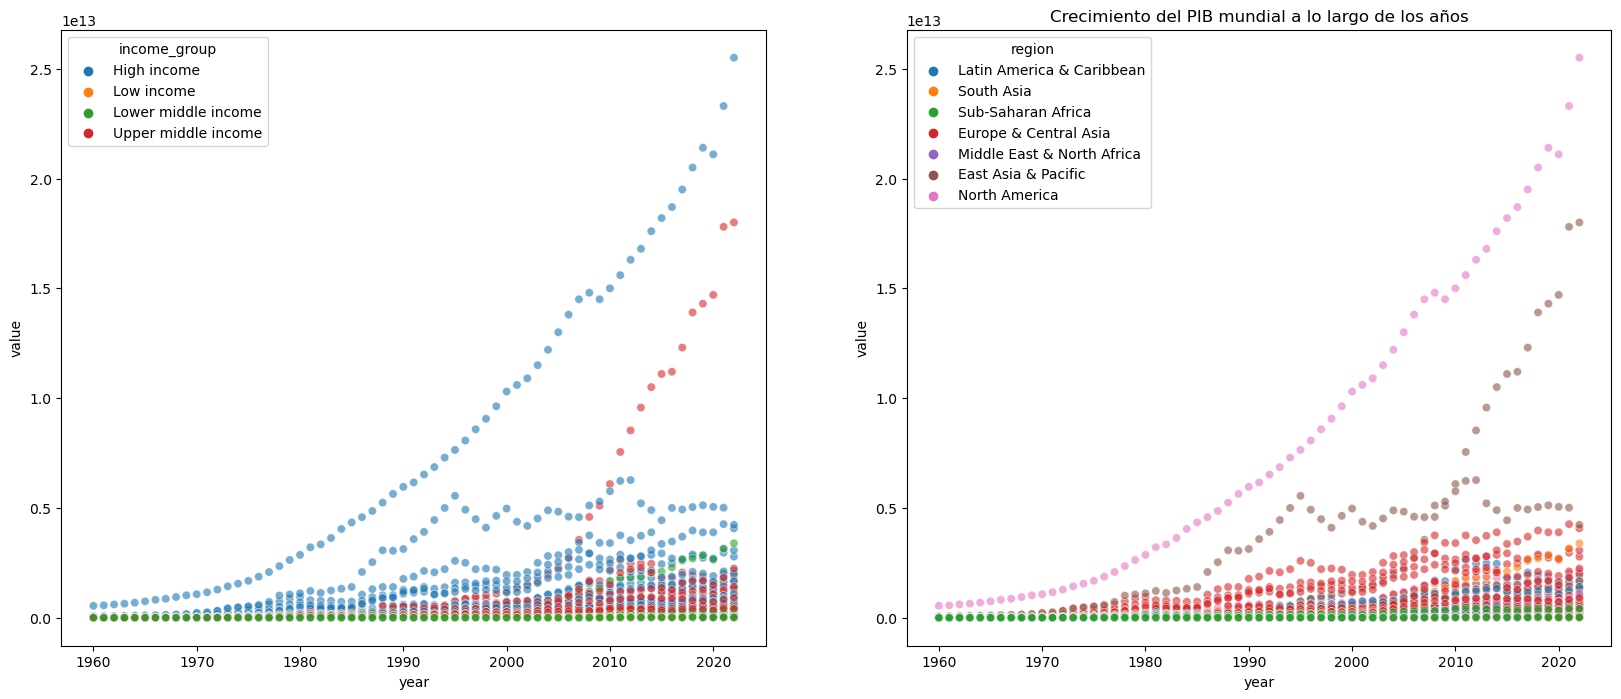

In [54]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

sns.scatterplot(x='year', y='value', data=df, hue='income_group', alpha=0.6, ax=axes[0])
plt.title('World GDP Groth Over the Years')

sns.scatterplot(x='year', y='value', data=df, hue='region', alpha=0.6, ax=axes[1])
plt.title('Crecimiento del PIB mundial a lo largo de los años')

## 4 - Conclusión

**Como podemos ver, los paises con mayores ingresos tienes las tasas de PIB más altas, como America del Norte o los paises de Asia Oriental y Pacífico**